In [44]:
#headers
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

#readingCSV
got = pd.read_csv("FnB_hackathon_Pi.csv" )

#removingWW
booleans = []
for x in got.Company:
    if x == "men":
        booleans.append(True)
    else:
        booleans.append(False)

is_long = pd.Series(booleans)
got_new = got[is_long]
 

#labelENCODING
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

got_new = MultiColumnLabelEncoder(columns = ['MONTH','Company','Area 1','Area 2','Area 3','Area 3 Classification','Outlet Type','Outlet Name','Product Category 1','Product Category 2','Product']).fit_transform(got_new)



#linearrig





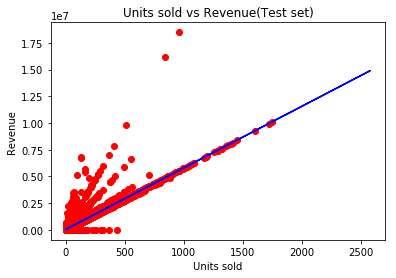

In [45]:
X = got_new[['Units sold']]
y = got_new['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

plot.scatter(X_test,y_test, color = 'red')
plot.plot(X_train,clf.predict(X_train), color = 'blue')
plot.title('Units sold vs Revenue(Test set)')
plot.xlabel('Units sold')
plot.ylabel('Revenue')
plot.show()

In [47]:
X = got_new[['Commission','Units sold']]
y = got_new['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9590448589336248